In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import numpy
import math
from scipy.stats import scoreatpercentile
from scipy.stats.mstats import mode, gmean, hmean
import pandas.tseries as sm
from sklearn import datasets
import statsmodels.api as sm
from scipy.stats.stats import pearsonr   

/Users/benjaminlusamba/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df1 = pd.read_csv('shiller.csv')

In [4]:
x = df1['Year'].values
i = df1['Long Interest Rate'].values
e = df1['Real Earnings'].values
d = df1['Real Dividend'].values
c = df1['CPI'].values
stock = df1['S&P Composite'].values

In [5]:
i_l = np.log(i)
e_l = np.log(e)
d_l = np.log(d)
cpi = np.log(c)
stk = np.log(stock)

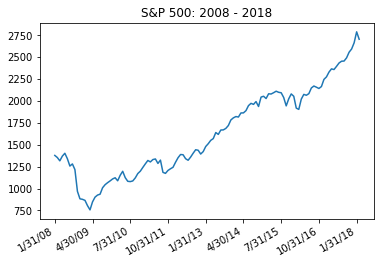

In [9]:
plt.plot(x,stock)
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
#axes.set_yticks(axes.get_yticks()[::50])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('S&P 500: 2008 - 2018')
plt.ylabel('')
plt.show()

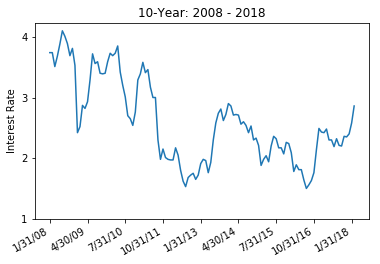

In [99]:
plt.plot(x,i)
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('10-Year: 2008 - 2018')
plt.ylabel('Interest Rate')
plt.show()

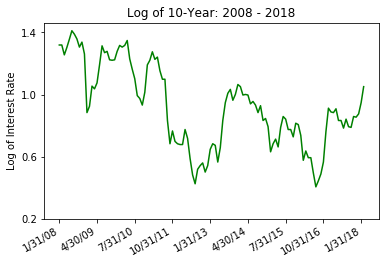

In [100]:
plt.plot(x,i_l, c = 'green')
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('Log of 10-Year: 2008 - 2018')
plt.ylabel('Log of Interest Rate')
plt.show()

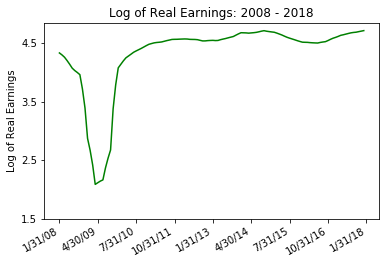

In [101]:
plt.plot(x,e_l, c = 'green')
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('Log of Real Earnings: 2008 - 2018')
plt.ylabel('Log of Real Earnings')
plt.show()

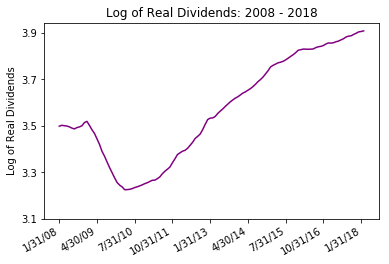

In [102]:
plt.plot(x,d_l, c = 'purple')
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('Log of Real Dividends: 2008 - 2018')
plt.ylabel('Log of Real Dividends')
plt.show()

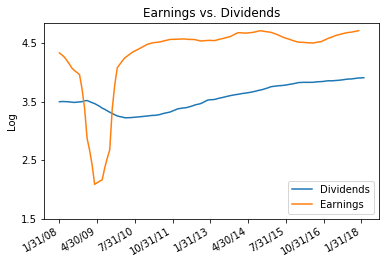

In [103]:
plt.plot(x,d_l,e_l)
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('Earnings vs. Dividends')
plt.ylabel('Log')
plt.gca().legend(('Dividends','Earnings')) 
plt.show()

(array([22., 12.,  9., 22., 10.,  9., 11., 27.]),
 array([3.22505158, 3.31052179, 3.395992  , 3.48146222, 3.56693243,
        3.65240264, 3.73787285, 3.82334306, 3.90881327]),
 <a list of 8 Patch objects>)

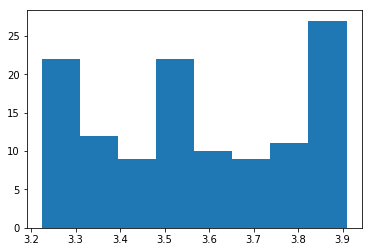

In [104]:
# Distribution of log of dividends: 
plt.hist(d_l, bins='auto', orientation='vertical')

In [105]:
#Logistic Regression of interest rate/dividends
model = sm.OLS(i_l, d_l).fit()
predictions = model.predict(d_l)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1160.
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           7.48e-64
Time:                        18:01:38   Log-Likelihood:                -23.620
No. Observations:                 122   AIC:                             49.24
Df Residuals:                     121   BIC:                             52.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2544      0.007     34.065      0.000       0.240       0.269
==============================================================================
Omnibus:                       29.559   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.014
Skew:                           0.202   Prob(JB):                       0.0300
Kurtosis:                       1.897   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

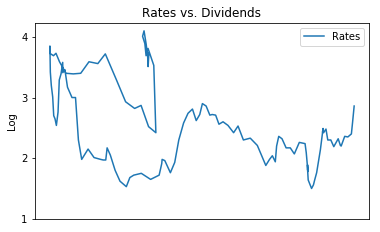

In [106]:
#Plot Rates vs. Dividends
plt.plot(d,i)
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::2])
axes.set_xticks(axes.get_xticks()[::15])
plt.title('Rates vs. Dividends')
plt.ylabel('Log')
plt.gca().legend(('Rates','Dividends')) 
plt.show()

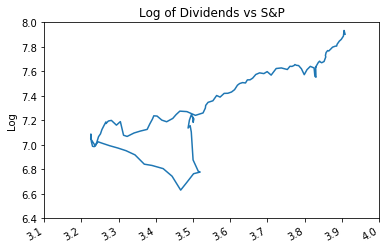

In [107]:
plt.plot(d_l,stk)
axes = plt.gca()   
plt.gcf().autofmt_xdate() 
axes.set_yticks(axes.get_yticks()[::1])
axes.set_xticks(axes.get_xticks()[::1])
plt.title('Log of Dividends vs S&P')
plt.ylabel('Log')
plt.show()

In [108]:
#Logistic Regression of market/dividends
model = sm.OLS(stk, d_l).fit()
predictions = model.predict(stk)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.175e+05
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          1.29e-182
Time:                        18:01:41   Log-Likelihood:                 3.0730
No. Observations:                 122   AIC:                            -4.146
Df Residuals:                     121   BIC:                            -1.342
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0567      0.006    342.747      0.000       2.045       2.069
==============================================================================
Omnibus:                        4.253   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                2.833
Skew:                           0.197   Prob(JB):                        0.243
Kurtosis:                       2.365   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""